In [1]:
filename = 'iris.data'
f = open(filename,'r')

datapoints = []

for x in f:
    temp_ls = []
    temp = ''
    for ch in x:
        if (ch >= '0' and ch <='9') or (ch == '.'):
#             print('ch:' + ch +' temp:' + temp)
            temp += ch
        elif ch == ',':
#             print('temp:' + temp)
            temp_ls.append(float(temp))
            temp = ''
        else:
            if(temp_ls != []):
                datapoints.append(temp_ls)
            break

# print(datapoints)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

principal_components = pca.fit_transform(datapoints)
principal_components

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

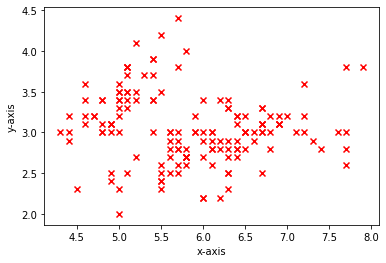

In [4]:
import matplotlib.pyplot as plt 

x_arr = []
y_arr = []

for point in datapoints:
    x_arr.append(point[0])
    y_arr.append(point[1])
 
plt.scatter(x_arr,y_arr, c = 'red', marker = 'x')

plt.xlabel('x-axis') 
plt.ylabel('y-axis') 

# plt.title('SSE vs num of clusters') 

plt.show() 


In [5]:
import math
def kernel_func(prev,point,h):
    exponential_term = (prev[0]-point[0])**2 + (prev[1]-point[1])**2
    exponential_term = -exponential_term/(2*(h**2))
    return ((1/(2*math.pi)) * (math.exp(exponential_term)))

In [6]:
def distance(point_a,point_b):
    return (point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2 

In [7]:
def find_attractor(x,h,epsilon):
    prev = x
    while(True):
        kernel_sum = 0
        kernel_weighted_sum = [0,0]
        for point in principal_components:
            kernel_term = kernel_func(prev,point,h)
            kernel_sum += kernel_term
            kernel_weighted_sum[0] += kernel_term*point[0]
            kernel_weighted_sum[1] += kernel_term*point[1]
            
        curr = [kernel_weighted_sum[0]/kernel_sum,kernel_weighted_sum[1]/kernel_sum]
        
        if distance(curr,prev) < epsilon:
            return curr
        
        prev = curr

In [8]:
def pdf(attr_point,h):
    kernel_sum = 0
    for point in principal_components:
        kernel_term = kernel_func(attr_point,point,h)
        kernel_sum += kernel_term
    
    return kernel_sum/(len(principal_components)*(h**2))

In [13]:
import time

start = time.time()

attractors = {}
h = 0.4
epsilon = 1.5
zi = 0.13
for point in principal_components:
    temp = find_attractor(point,h,epsilon)
    if pdf(temp,h) > zi:
        attractors[tuple(temp)] = point

end = time.time()
print('Time taken:' + str(end-start))

Time taken:0.15957188606262207


In [10]:
for point in attractors:
    print(attractors[point])

[-2.68420713  0.32660731]
[-2.71539062 -0.16955685]
[-2.88981954 -0.13734561]
[-2.7464372  -0.31112432]
[-2.72859298  0.33392456]
[-2.27989736  0.74778271]
[-2.82089068 -0.08210451]
[-2.62648199  0.17040535]
[-2.88795857 -0.57079803]
[-2.67384469 -0.1066917 ]
[-2.50652679  0.65193501]
[-2.61314272  0.02152063]
[-2.78743398 -0.22774019]
[-3.22520045 -0.50327991]
[-2.6225262   0.81808967]
[-2.64832273  0.31913667]
[-2.19907796  0.87924409]
[-2.58734619  0.52047364]
[-2.3105317   0.39786782]
[-2.54323491  0.44003175]
[-3.21585769  0.14161557]
[-2.30312854  0.10552268]
[-2.35617109 -0.03120959]
[-2.50791723 -0.13905634]
[-2.469056    0.13788731]
[-2.56239095  0.37468456]
[-2.63982127  0.31929007]
[-2.63284791 -0.19007583]
[-2.58846205 -0.19739308]
[-2.41007734  0.41808001]
[-2.64763667  0.81998263]
[-2.86699985  0.0771931 ]
[-2.62522846  0.60680001]
[-2.98184266 -0.48025005]
[-2.59032303  0.23605934]
[-2.77013891  0.27105942]
[-2.99829644 -0.33430757]
[-2.4055141   0.19591726]
[-2.20883295

In [11]:
len(attractors)

114

In [12]:
import time

cluster = {}

for point in attractors:
    cluster[tuple(attractors[point])] = -1

cluster_number = 0

start = time.time()

for point in attractors:
    if(cluster[tuple(attractors[point])] == -1):
        cluster_number += 1
#         cluster[tuple(point)] = cluster_number
        cluster[tuple(attractors[point])] = cluster_number
        for point_a in attractors:
            if(abs(point[0] - point_a[0]) < h/2 or abs(point[1] - point_a[1]) < h/2):
                if(cluster[tuple(attractors[point_a])] == -1):
#                     cluster[tuple(point_a)] = cluster_number
                    cluster[tuple(attractors[point_a])] = cluster_number

end = time.time()
print('Time taken:' + str(end-start))

Time taken:0.001994609832763672


In [120]:
itr = 0
for c in cluster:
    print('itr:' + str(itr) + ': ' + str(c) + ': '+str(cluster[c]))
    itr += 1

itr:0: (-2.6842071251039537, 0.3266073147643892): 1
itr:1: (-2.715390615634135, -0.16955684755602698): 1
itr:2: (-2.8898195396179194, -0.13734560960502798): 1
itr:3: (-2.746437197308738, -0.311124315751992): 1
itr:4: (-2.728592981831318, 0.3339245635684543): 1
itr:5: (-2.2798973610096, 0.7477827132251329): 1
itr:6: (-2.8208906821806337, -0.08210451102468108): 1
itr:7: (-2.6264819933238224, 0.1704053489602894): 1
itr:8: (-2.887958565335638, -0.5707980263315918): 1
itr:9: (-2.6738446867191246, -0.10669170375273898): 1
itr:10: (-2.5065267893389063, 0.6519350136725713): 1
itr:11: (-2.6131427182710594, 0.021520631960257636): 1
itr:12: (-2.787433975997101, -0.22774018887110672): 1
itr:13: (-3.225200446274985, -0.5032799094854261): 2
itr:14: (-2.622526203125812, 0.8180896745965948): 1
itr:15: (-2.64832273247913, 0.3191366677508841): 1
itr:16: (-2.1990779614307656, 0.8792440880917356): 1
itr:17: (-2.5873461889177416, 0.5204736388059675): 1
itr:18: (-2.310531701313136, 0.3978678215888914): 1
it

In [121]:
cluster_number

3

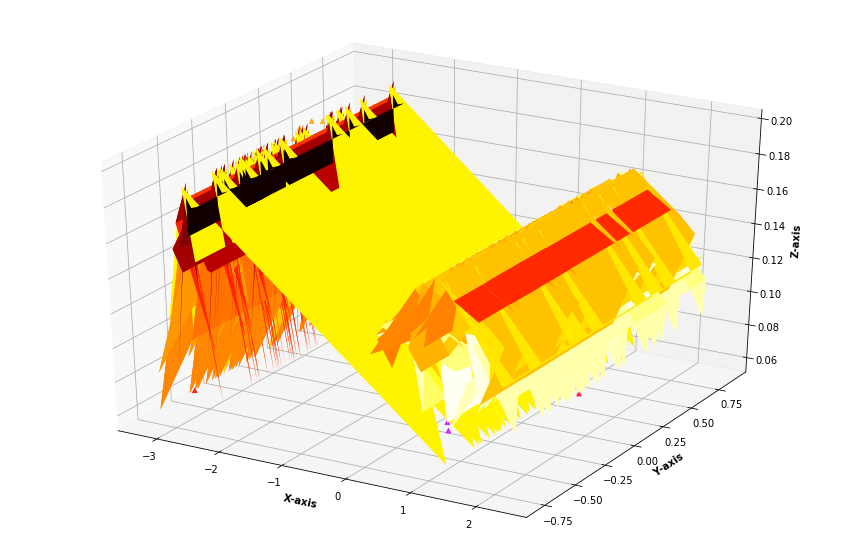

In [133]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

ax = plt.axes(projection = '3d')

z = []
x = []
y = []

for c in cluster:
    x.append(c[0])
    y.append(c[1])
    
    z.append(pdf(c,h))

X,Y = np.meshgrid(x,y)
Z,T = np.meshgrid(z,z)
ax.plot_surface(X,Y,Z,cmap='hot_r')

my_cmap = plt.get_cmap('hsv')


ax.scatter3D(x, y, z,alpha = 0.8,c = x , cmap = my_cmap, marker ='^')

ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

plt.show()
# print(Z)